In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
%matplotlib inline  

import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

sys.path.append('..')
from utils import *
from data import *
from plotting import *

In [3]:
import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

In [4]:
data = process_kids('/media/snakoneczny/data/KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits', sdss_cleaning=True)

Data shape: (152244, 47)
Droping NANs: 130777 (85.90%) left
Removing errors bigger than 1: 129111 (84.81%) left
Removing GAAP flags: 129111 left
Removing IMA flags: 128675 (84.52%) left
Cleaning SDSS: 121323 left


In [6]:
# data_sampled = data.sample(20000, random_state=4591)

In [5]:
X = data[FEATURES['all']]
X_scaled = MinMaxScaler().fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


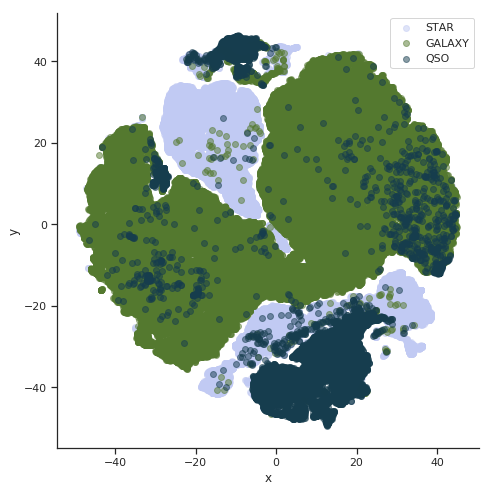

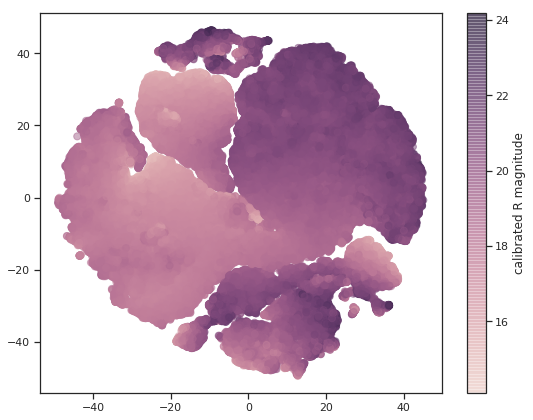

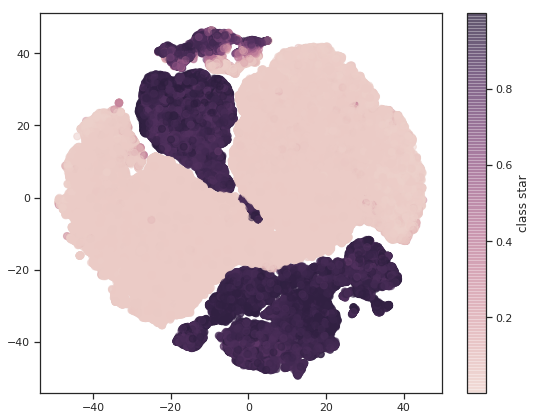

In [7]:
# Class plot
plot_embedding(X_embedded, data['CLASS'], label='object type')

# Magnitude plot
plot_embedding(X_embedded, data[MAG_GAAP_STR.format('r')], label='calibrated R magnitude', is_continuous=True)

# Class star plot
plot_embedding(X_embedded, data['CLASS_STAR'], label='class star', is_continuous=True)

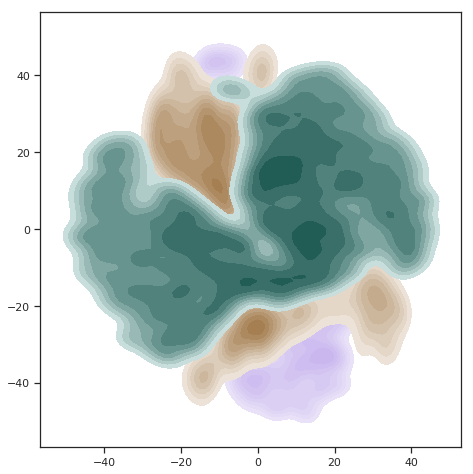

In [10]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

color_palette = get_cubehelix_palette(len(BASE_CLASSES))

# Single class plots
for i, c in enumerate(BASE_CLASSES):
    idx_class = (data['CLASS'] == c)

    # Draw the two density plots
    ax = sns.kdeplot(X_embedded[idx_class][:, 0], X_embedded[idx_class][:, 1],
                     color=color_palette[i], shade=True, shade_lowest=False)

# Add labels to the plot
# red = sns.color_palette("Reds")[-2]
# blue = sns.color_palette("Blues")[-2]
# ax.text(2.5, 8.2, "virginica", size=16, color=blue)
# ax.text(3.8, 4.5, "setosa", size=16, color=red)

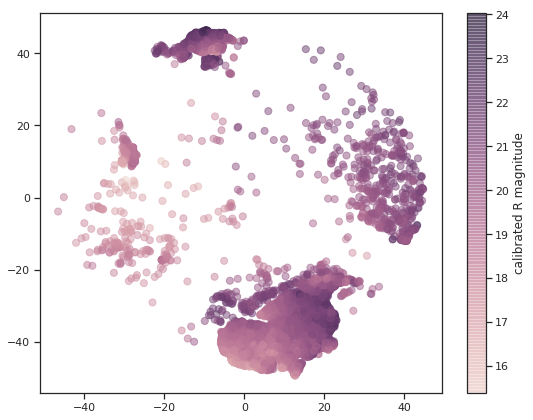

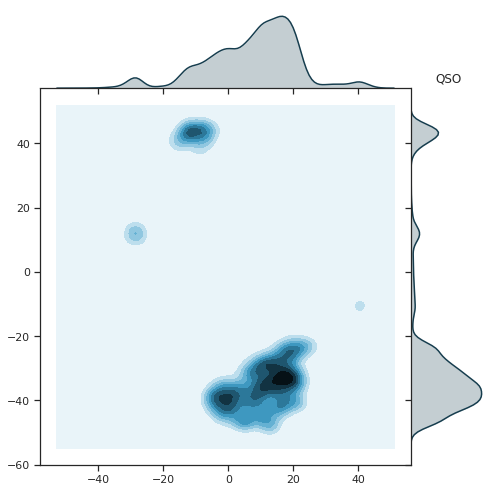

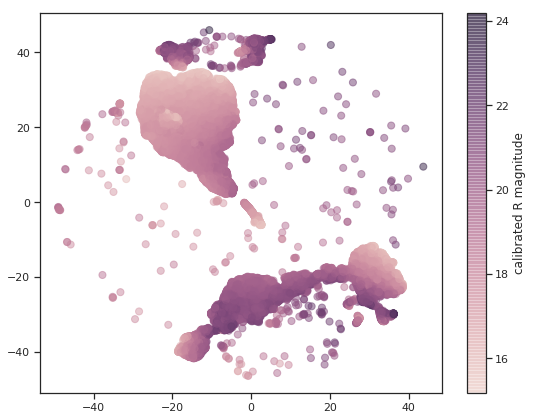

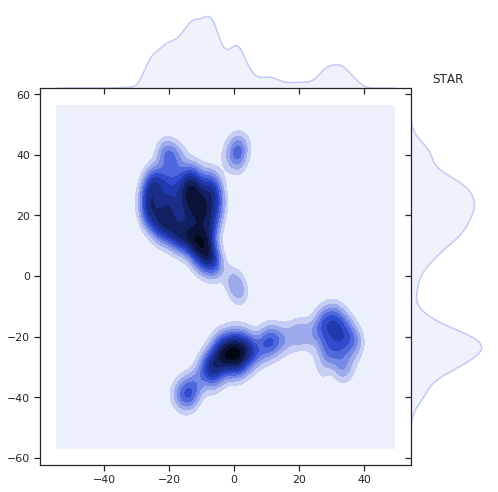

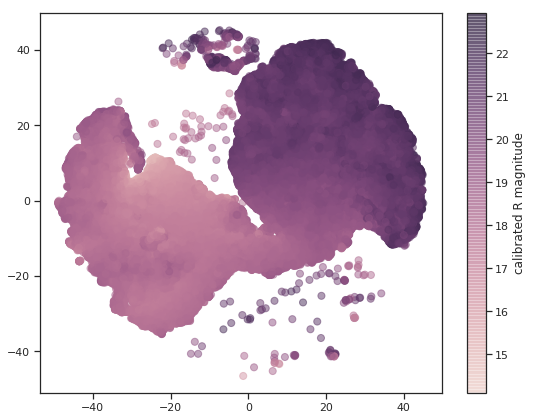

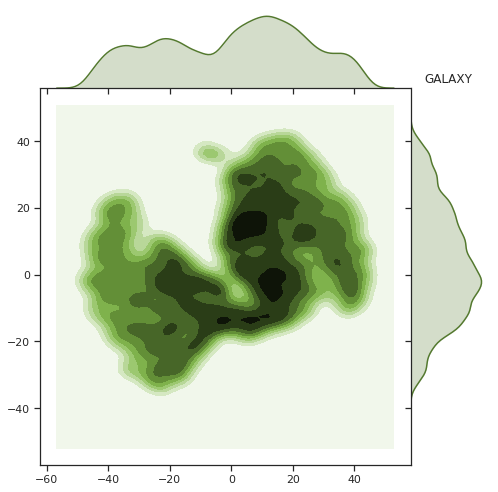

In [11]:
# Single class plots
for c in BASE_CLASSES:
    idx_class = (data['CLASS'] == c)
    
    plot_embedding(X_embedded[idx_class], data.loc[idx_class, MAG_GAAP_STR.format('r')],
                   label='calibrated R magnitude', is_continuous=True)
    
    sns.jointplot(X_embedded[idx_class][:, 0], X_embedded[idx_class][:, 1], kind='kde', height=7, space=0,
                 color=CUSTOM_COLORS[c])
    
    plt.title(c)